# Moon Phase Detection

In [1]:
#Importing Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


D:\Python\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Fetch Images count from Folders

In [2]:
count = 0 
dirs = os.listdir('Moon/')
for dir in dirs:
    files = list(os.listdir('Moon/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Moon')
    count = count + len(files)
print( 'Moon Folder has '+ str(count) + ' Images')

first quarter Folder has 123 Moon
full moon Folder has 235 Moon
new moon Folder has 27 Moon
third quarter Folder has 100 Moon
waning crescent Folder has 100 Moon
waning gibbous Folder has 100 Moon
waxing crescent Folder has 100 Moon
waxing gibbous Folder has 159 Moon
Moon Folder has 944 Images


#### Load Images into Arrays as Dataset

In [20]:
base_dir = 'Moon/'
img_size = 180
batch = 12

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 944 files belonging to 8 classes.
Using 756 files for training.
Found 944 files belonging to 8 classes.
Using 188 files for validation.


In [22]:
moon_phases = train_ds.class_names
moon_phases

['first quarter',
 'full moon',
 'new moon',
 'third quarter',
 'waning crescent',
 'waning gibbous',
 'waxing crescent',
 'waxing gibbous']

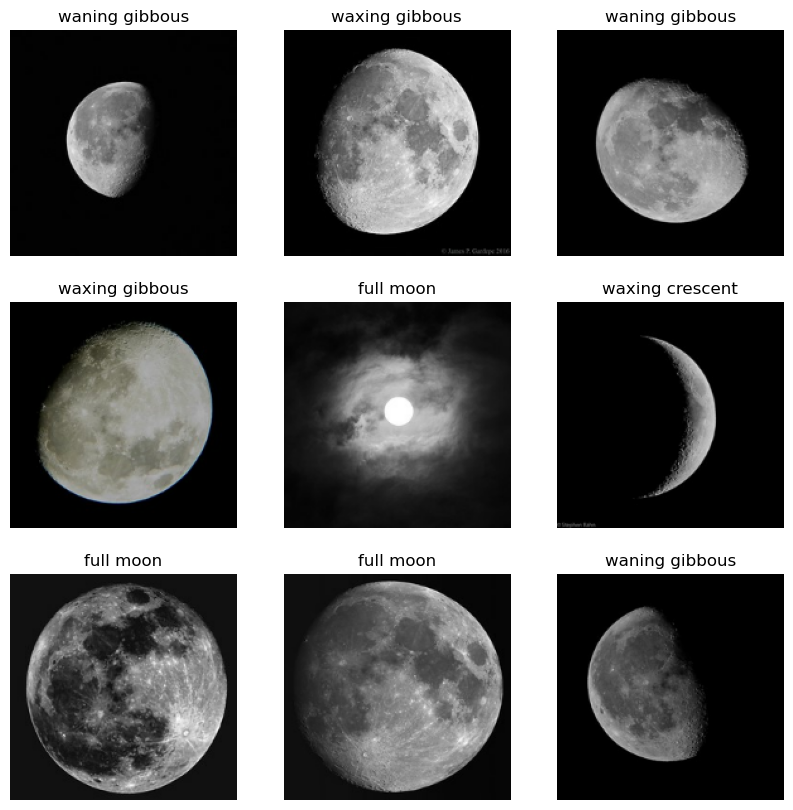

In [27]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(moon_phases[labels[i]])
        plt.axis('off')

In [28]:
AUTOTUNE = tf.data.AUTOTUNE

In [42]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [43]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

#### Data Augmentation

In [44]:
data_augmentation = Sequential([
    layers.RandomFlip("vertical", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

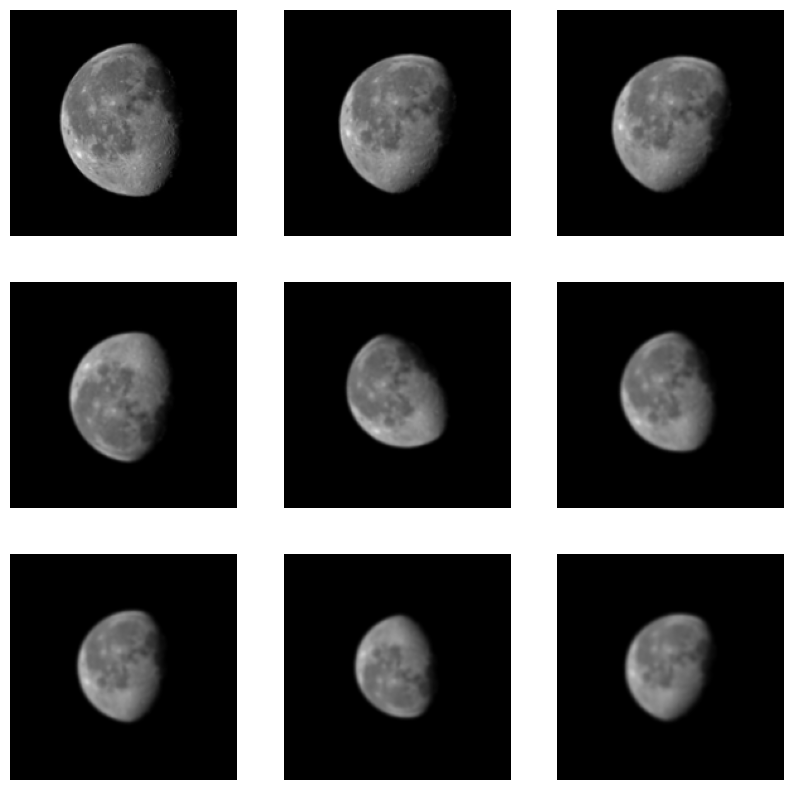

In [45]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

#### Model Creation

In [72]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(8)
])

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [74]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [78]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.7356 - loss: 0.7028 - val_accuracy: 0.6755 - val_loss: 0.8925
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.7409 - loss: 0.6848 - val_accuracy: 0.7181 - val_loss: 0.8372
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.7709 - loss: 0.6360 - val_accuracy: 0.7234 - val_loss: 0.8330
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.7985 - loss: 0.5406 - val_accuracy: 0.7181 - val_loss: 0.9744
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.7949 - loss: 0.5840 - val_accuracy: 0.6862 - val_loss: 0.9631
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.8256 - loss: 0.5070 - val_accuracy: 0.7128 - val_loss: 0.9499
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.7766 - loss: 0.5979 - val_accuracy: 0.7128 - val_loss: 0.8603
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.8104 - loss: 0.5254 - val_accuracy: 

In [79]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + moon_phases[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

#### Images Testing

In [85]:
classify_images('wxc.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


'The Image belongs to waxing crescent with a score of 99.9211072921753'

In [86]:
classify_images('wxg.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'The Image belongs to waxing crescent with a score of 91.87657833099365'

In [94]:
classify_images('waning-gibbous.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'The Image belongs to waning gibbous with a score of 99.50206279754639'

In [88]:
classify_images('wac.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'The Image belongs to waning crescent with a score of 85.42565703392029'

In [89]:
classify_images('fm.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


'The Image belongs to full moon with a score of 99.50968623161316'

In [90]:
classify_images('nm.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'The Image belongs to new moon with a score of 99.66202974319458'

In [95]:
classify_images('third-quarter.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'The Image belongs to third quarter with a score of 84.30743217468262'

In [92]:
classify_images('fr.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


'The Image belongs to first quarter with a score of 97.39508032798767'

#### Saving the model for ui as well, which IDK

In [ ]:
# model.save('Moon_Phase_Detection.h5')